In [1]:
#Necessary imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Generating the Inputs and the first k predictions
k = 5
z = np.array([np.sin(np.cos(t/10) + 2 * np.cos(t/5)) for t in range(205)])
s = np.zeros_like(z)
w = np.random.rand()
u = np.random.rand()
s_prev = 0
for i in range(k):
    s[i] = np.tanh((w*z[i]) + (u * s_prev))
    s_prev = s[i]

In [3]:
#Function to run the RNN prediction to get the prediction of the next output
def get_next_output(w,u,inputs,s_prev):
    s_temps = []
    for i in range(len(inputs)):
        s_temp = np.tanh(w*inputs[i] + u*s_prev)
        s_temps.append(s_temp)
        s_temp_prev=s_temp
    return s_temp,np.array(s_temps)

In [4]:
#Actual preiction funtion for 200 values and update u and w using back propogation
def predict(z,s,w,u):
    MSE = []
    for i in range(5,len(z)):
        rnn_input = z[i-k:i]
        s_prev = s[i-1]
        predicted_output,s_rnn_values = get_next_output(w,u,rnn_input,s_prev)
        s[i] = predicted_output
        mse = 0.5 * ((s[i] - z[i]) ** 2)
        MSE.append(mse)
        du = (s[i] - z[i]) * (1 - (s[i])** 2)
        dw = (s[i] - z[i]) * (1 - (s[i])** 2)
        dw_part2 = 0
        for y in range(i-2,i-k-1,-1):
            #print(y)
            du = du * s[y]
            dw_part2+= (u * z[y] * (1 - (s[y])**2))
        dw = (dw * (z[i-1] + dw_part2))
        w = w - (0.01 * dw)
        u = u - (0.01 * du)
    return z,s,w,u,MSE

In [5]:
z,s,w,u,MSE = predict(z,s,w,u)

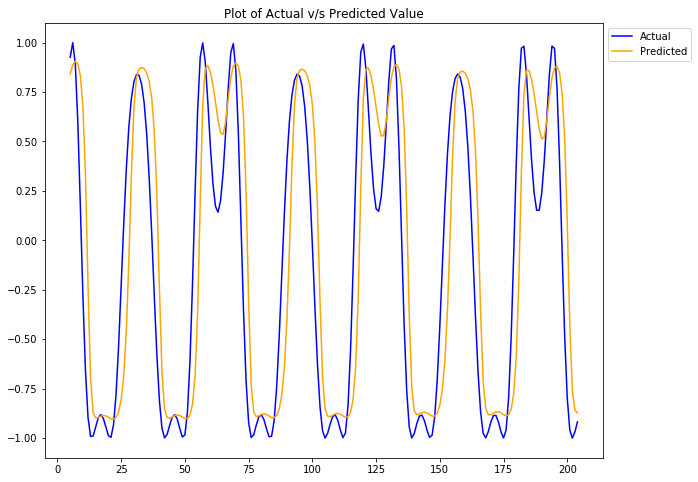

In [6]:
#Plot of Actual v/s Prediction of the time series values
fig,ax = plt.subplots(figsize=(10,8))
plt.plot([*range(5,205)],z[5:],label = 'Actual',color = 'blue')
plt.plot([*range(5,205)],s[5:],label = 'Predicted',color = 'orange')
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('Plot of Actual v/s Predicted Value')
plt.show()

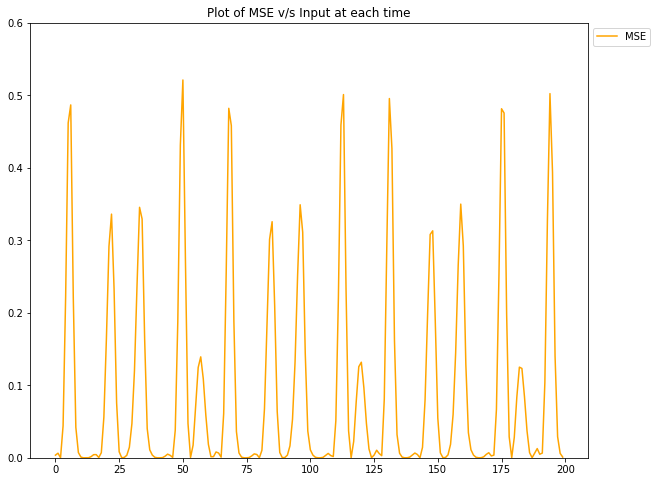

In [7]:
#Plot of MSE v/s input time series
fig,ax = plt.subplots(figsize=(10,8))
plt.plot(MSE,label = 'MSE',color = 'orange')
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('Plot of MSE v/s Input at each time')
plt.ylim(0,0.6)
plt.show()

As we can see from the graph of plot of Actual v/s predicted values, the predicted values are close to the actual values when considering an RNN rolled 5 times ( 5 previous inputs are considered to predict the next output)<br/><br/>
From the MSE plot we can see that as the RNN is train for the time series,the error reduces and again shoots up when a peak occurs during the time series. As it is a plot of MSE v/s time, we recieve this kind of a graph. For the MSE to gradually decrase, we need to plot it based on the number of epochs.